# Biomolecular Analysis with Python 🧪
### Characterize molecules, visualize them in 2D & 3D, perform similarity analysis and get their properties
#### By Diego Lopez Yse

<a href="https://github.com/dlopezyse">GitHub</a> | <a href="https://twitter.com/lopezyse">Twitter</a> | <a href="https://www.linkedin.com/in/lopezyse/">LinkedIn</a>


Start by importing all necessary libraries

In [1]:
import py3Dmol
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import DataStructs

Simplified Molecular Input Line Entry System (SMILES), is an unambiguous short notation of chemical structures that is used for some chemical databases and for programs that predict properties of chemicals from their respective chemical structures.

Carbon dioxide (CO2) is a chemical compound made up of molecules that each have one carbon atom covalently double bonded to two oxygen atoms. It can be represented with SMILES and visualized like this:

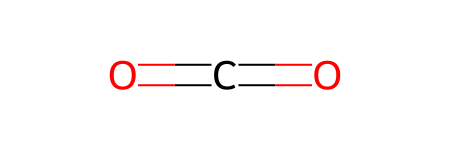

In [2]:
carbondio_mol = Chem.MolFromSmiles("C(=O)=O")
carbondio_mol

You can detail atom numbers on a molecule with the following script:

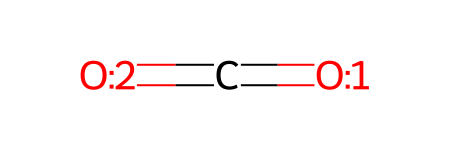

In [3]:
def mol_with_atom_index(mol):
    for atom in mol.GetAtoms():
        atom.SetAtomMapNum(atom.GetIdx())
    return mol

mol_with_atom_index(carbondio_mol)

Highlight a specific element. In this example, carbon:

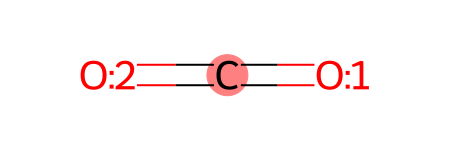

In [4]:
carbon = Chem.MolFromSmiles('C')
carbondio_mol.GetSubstructMatches(carbon)
carbondio_mol

Now, let's try a bigger molecule. Alanine is an amino acid that is used in the biosynthesis of proteins. It contains an amine group and a carboxylic acid group, both attached to the central carbon atom which also carries a methyl group side chain.

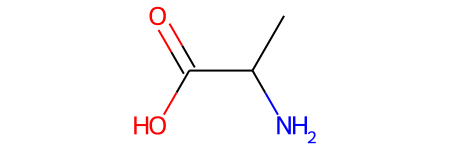

In [5]:
alanine_mol = Chem.MolFromSmiles("CC(N)C(O)=O")
alanine_mol

You can also manually highlight specific atoms in alanine (like atoms 0, 4 and 5):

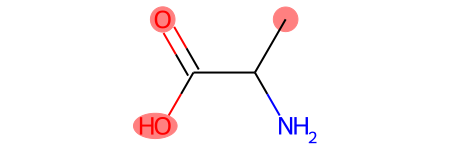

In [6]:
alanine_mol.__sssAtoms = [0,4,5]
alanine_mol

Let's get the total number of atoms in alanine:

In [7]:
alanine_mol.GetNumAtoms()

6

Using the RDKit library, normally molecules are stored with the hydrogen atoms implicit (e.g. not explicitly present in the molecular graph. When it is useful to have the hydrogens explicitly present, for example when generating or optimizing the 3D geometry, the Chem.AddHs function can be used:

In [8]:
alanine_mol_with_H = Chem.AddHs(alanine_mol)
alanine_mol_with_H.GetNumAtoms()

13

Now let's define 2 other molecules:
- Glycine, which is another non-polar amino acid similar to lycine
- Carbon trioxide, a molecule similar to carbon dioxide

In [9]:
glycine_mol = Chem.MolFromSmiles("C(C(=O)O)N")
carbontrio_mol = Chem.MolFromSmiles("C(=O)([O])[O]")

Next, we can measure similarity between them.
The default similarity metric used by rdkit.DataStructs.FingerprintSimilarity() is the Tanimoto similarity. One can use different similarity metrics including Tanimoto, Dice, Cosine, Sokal, Russel, Kulczynski, McConnaughey, and Tversky.

In [10]:
ms = [alanine_mol, glycine_mol, carbondio_mol, carbontrio_mol]
fps = [Chem.RDKFingerprint(x) for x in ms]
print(DataStructs.FingerprintSimilarity(fps[0],fps[1], metric=DataStructs.DiceSimilarity))
print(DataStructs.FingerprintSimilarity(fps[1],fps[2], metric=DataStructs.DiceSimilarity))

0.7619047619047619
0.14285714285714285


Dice similarity between alanine and glycine is high (0.76), while between glycine and carbon dioxide is low (0.14)

A variety of molecular descriptors are available within the RDKit: the complete list is provided in
<a href="https://www.rdkit.org/docs/GettingStartedInPython.html#list-of-available-descriptors">List of Available Descriptors</a>.
As an example, let's estimate the <a href="https://en.wikipedia.org/wiki/Polar_surface_area">Topological polar surface area (TPSA) </a> of glycine

In [11]:
from rdkit.Chem import Descriptors
Descriptors.TPSA(glycine_mol)

63.31999999999999

You can visualize descriptors like molecular atomic charges using the Gasteiger charge calculation method. Compute it for alanine:

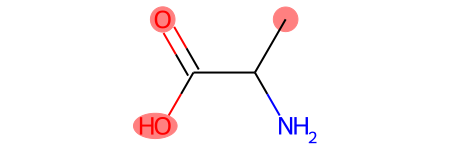

In [12]:
AllChem.ComputeGasteigerCharges(alanine_mol)
alanine_mol

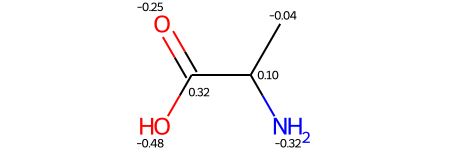

In [13]:
alanine_mol_charges = Chem.Mol(alanine_mol)
for at in alanine_mol_charges.GetAtoms():
    lbl = '%.2f'%(at.GetDoubleProp("_GasteigerCharge"))
    at.SetProp('atomNote',lbl)
alanine_mol_charges

The Gasteiger partial charges can be visualized as (using a different color scheme):

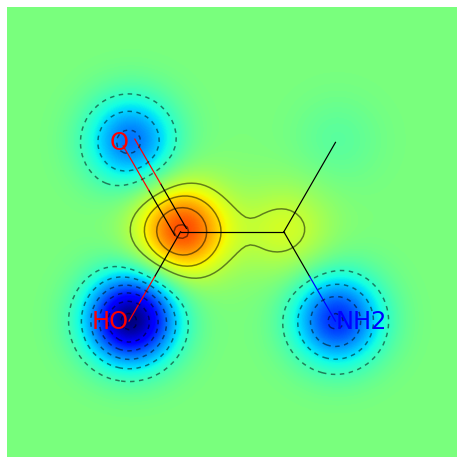

In [14]:
from rdkit.Chem.Draw import SimilarityMaps
contribs = [alanine_mol_charges.GetAtomWithIdx(i).GetDoubleProp('_GasteigerCharge') for i in range(alanine_mol_charges.GetNumAtoms())]
fig = SimilarityMaps.GetSimilarityMapFromWeights(alanine_mol_charges, contribs, colorMap='jet', contourLines=10)

You can also create interactive 3D visuals. Let's try with alanine:

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

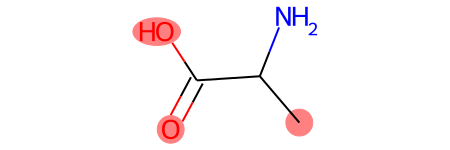

In [15]:
alanine_mol
AllChem.EmbedMolecule(alanine_mol)
rdkit.Chem.Draw.IPythonConsole.ipython_3d = True  # enable py3Dmol inline visualization
alanine_mol

For more complex molecules, instead of manually representing them, it's easier to pull them directly from sites like <a href="https://pubchem.ncbi.nlm.nih.gov/">PubChem</a>. In that case, all you need to do is define its id. See the example below for a cholesterol molecule:

In [16]:
cid_for_query = 'cid:5997'

In [17]:
view = py3Dmol.view(width=680, height=300, query=cid_for_query, linked=False)
view.setStyle({'stick': {}})
view.setBackgroundColor('#FFFFFF')
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

For protein molecules, it's possible to pull them directly from <a href="https://www.rcsb.org/">Protein Drug Bank</a>. See the example of a deoxy human hemoglobin:

In [18]:
#https://www.rcsb.org/structure/1a3n
view = py3Dmol.view(width=680, height=300, query='pdb:1A3N', linked=False)
view.setStyle({'cartoon':{'color':'spectrum'}})
view.setBackgroundColor('#FFFFFF')
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Moreover, you can fine tune visualizations to match any style. For hemoglobin, you can set up separate styles for each one of its four polypeptide chains (two alpha chains and two beta chains):

In [19]:
view = py3Dmol.view(width=680, height=300, query='pdb:1A3N', linked=False)

chA = {'chain':'A'}
chB = {'chain':'B'}
chC = {'chain':'C'}
chD = {'chain':'D'}
view.setStyle(chA,{'cartoon': {'color':'blue'}})
view.setStyle(chB,{'stick':{}})
view.setStyle(chC,{'cartoon':{'arrows':True, 'color':'cyan'}})
view.setStyle(chD,{'cartoon': {'color':'gray'}})
view.setBackgroundColor('#FFFFFF')
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

#### Reference: <a href="https://www.rdkit.org/docs/GettingStartedInPython.html">Getting Started with the RDKit in Python</a>